In [3]:
from matplotlib import pyplot as plt
from matplotlib.widgets import Button, Slider
import numpy as np

In [5]:
%matplotlib widget

# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)
# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)
plt.show()

ImportError: The GTK3 backends require PyGObject

In [4]:
# Gaussian matrix
def gaussian2d(x, y, sig):
    return np.exp(-(x**2 + y**2) / (2 * sig**2)) / (2 * np.pi * sig**2)

# Zero_Crossing, no delta
def log_2d(x,y,sigma):
    return ((x**2 + y**2)/sigma**4 - 2/sigma**2)*gaussian2d(x,y,sigma)

def kernel_log_2d(size, sigma):
    kernel = np.fromfunction(lambda x, y: log_2d(x - size // 2, y - size // 2, sigma), (size, size))
    kernel *= 100/np.min(kernel)
    kernel = np.round(kernel, 0)
    return kernel

def convolve_zero_cross(img, kernel, delta):
    filtered = cv2.filter2D(img, cv2.CV_64F, kernel, borderType=cv2.BORDER_REPLICATE)
    return zero_cross(filtered, delta)

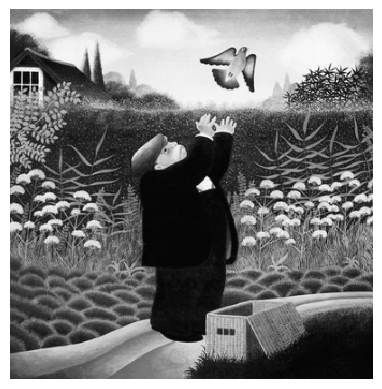

In [8]:
img = cv2.imread('base.png', cv2.IMREAD_GRAYSCALE) 
plt.axis('off')
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.show()

In [ ]:
frames = []
for i, sigma in enumerate(s):
    Z = log_2d(X, Y, sigma)
    kernel = kernel_log_2d(size, sigma)
    frames.append(go.Frame(
        name=i,
        data=[go.Surface(z=Z, x=x, y=y), 
        go.Heatmap(z=convolve_zero_cross(img, kernel, delta), colorscale='gray')]))
